##Cloning darknet Repository and doing some prework

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15138, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 15138 (delta 29), reused 50 (delta 23), pack-reused 15073
Receiving objects: 100% (15138/15138), 13.47 MiB | 20.34 MiB/s, done.
Resolving deltas: 100% (10274/10274), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# To upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# To download a file  
def download(path):
  from google.colab import files
  files.download(path)

## Mount Google Drive

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
# To use path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

# Training a Custom YOLOv3 Object Detector in the Cloud!

In order to create a custom YOLOv3 detector the following files need to be prepared:

*   Labeled Custom Dataset
*   Custom .cfg file
*   obj.data and obj.names files
*   train.txt file 


In [ ]:
# store above mentioned files into google drive and access them in colab.
!ls /mydrive/ts_yolov3

backup		   obj_ts.names  train_ts.txt
generate_train.py  obj_ts.zip	 yolov3_ts_test.cfg
obj_ts_data.data   test_ts.txt	 yolov3_ts_train.cfg


In [ ]:
# copy the .zip file into the root directory of cloud VM
%cd darknet
!cp /mydrive/ts_yolov3/obj_ts.zip ../

/content/darknet


In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj_ts
!unzip ../obj_ts.zip -d data/

##Step 3: Configuring Files for Training


##i) Cfg File

In [ ]:
## to download to local machine 
#download('cfg/yolov3.cfg')

In [ ]:
# upload the custom_train .cfg back to cloud VM from Google Drive
!cp /mydrive/ts_yolov3/yolov3_ts_train.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine
# %cd cfg
# upload()
# %cd .. 

##ii) obj.names and obj.data
--> Create a  **obj_ts.names** file with text editer and make this file exactly the same as the classes.txt 

--> create a **obj_ts_data.data** file (change the number of classes accordingly, as well as the backup location)

In [ ]:
# upload the obj_ts.names and obj_ts_data.data files to cloud VM from Google Drive
!cp /mydrive/ts_yolov3/obj_ts.names ./data
!cp /mydrive/ts_yolov3/obj_ts_data.data  ./data

# upload the obj.names and obj.data files to cloud VM from local machine
# %cd data
# upload()
# %cd .. 

##iii) Copying train.txt and test.txt files

In [ ]:
# upload the train_ts.txt and test_ts.txt files to cloud VM from Google Drive
!cp /mydrive/ts_yolov3/train_ts.txt ./data
!cp /mydrive/ts_yolov3/test_ts.txt ./data

In [ ]:
# verify train.txt can be seen in darknet/data folder
!ls data/

9k.tree     giraffe.jpg		      labels		person.jpg
coco9k.map  goal.txt		      obj_ts		scream.jpg
coco.names  horses.jpg		      obj_ts_data.data	test_ts.txt
dog.jpg     imagenet.labels.list      obj_ts.names	train_ts.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	voc.names


##Step 4: Download pre-trained weights for the convolutional layers.


In [ ]:
# upload pretrained convolutional layer weights for initial training...
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2021-06-08 09:53:14--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2021-06-08 09:53:14--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  4.32MB/s    in 26s     

2021-06-08 09:53:41 (5.91 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



##Step 5: Train TS Detector!

In [ ]:
# # train custom TS detector
# !./darknet detector train data/obj_ts_data.data cfg/yolov3_ts_train.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.699107), count: 1, class_loss = 0.476083, iou_loss = 0.085324, total_loss = 0.561407 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.652584), count: 5, class_loss = 1.071086, iou_loss = 0.916955, total_loss = 1.988041 
 total_bbox = 46914, rewritten_bbox = 0.166262 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000002, iou_loss = 0.000000, total_loss = 0.000002 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00

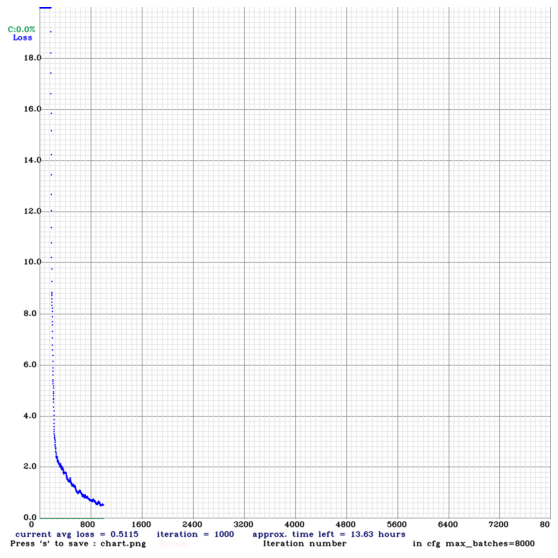

In [ ]:
imShow('chart.png')

###To start with last saved weights...

In [ ]:
!./darknet detector train data/obj_ts_data.data cfg/yolov3_ts_train.cfg /mydrive/ts_yolov3/backup/yolov3_ts_train_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
 total_bbox = 1320, rewritten_bbox = 0.075758 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.001148, iou_loss = 0.000000, total_loss = 0.001148 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.853655), count: 3, class_loss = 0.010655, iou_loss = 0.088317, total_loss = 0.098971 
 total_bbox = 1323, rewritten_bbox = 0.075586 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.829497), count: 1, class_loss = 0.000013, iou_loss = 0.015076, total_loss = 0.015090 
v3 (mse lo

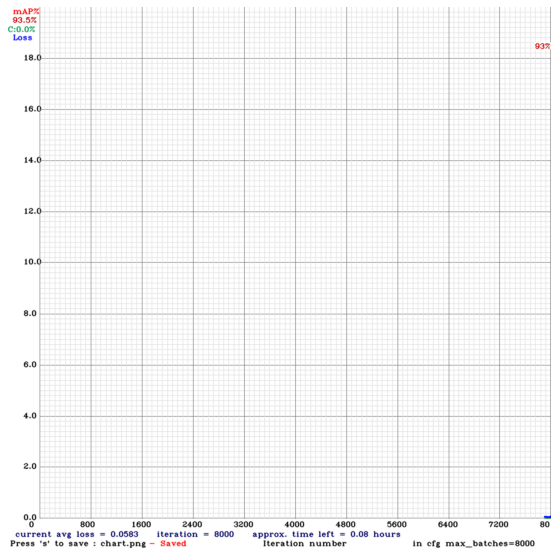

In [ ]:
imShow('chart.png')

In [ ]:
# LOCAL MACHINE DOWNLOAD
download('chart.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Step 6: Run Custom TS Object Detector!!!

In [ ]:
# upload the custom_test .cfg back to cloud VM from Google Drive
!cp /mydrive/ts_yolov3/yolov3_ts_test.cfg ./cfg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

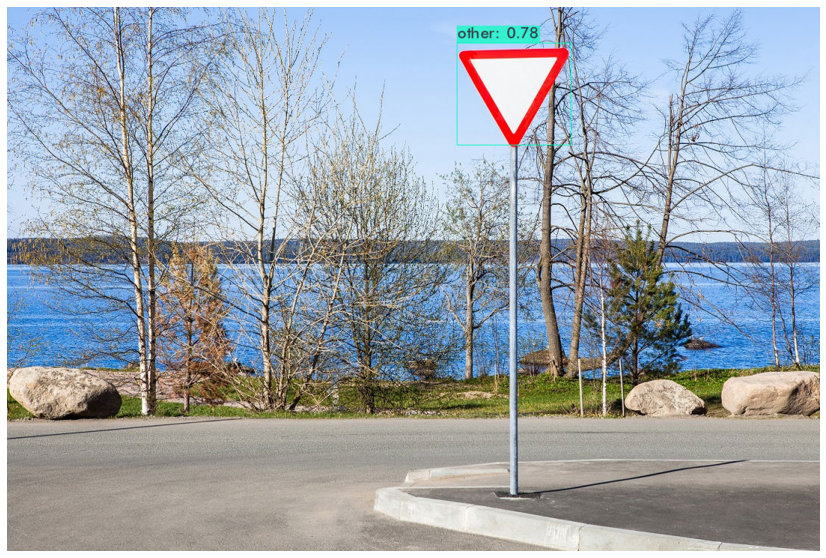

In [ ]:
# run custom detector (upload an image to google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj_ts_data.data cfg/yolov3_ts_test.cfg /mydrive/ts_yolov3/backup/yolov3_ts_train_best.weights /mydrive/ts_test_img/traffic-sign-to-test.jpg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
# LOCAL MACHINE DOWNLOAD
# if get an error first run then run it again and it should work
download('predictions.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Calculate Mean Average Precision

In [ ]:
!./darknet detector map data/obj_ts_data.data cfg/yolov3_ts_train.cfg /mydrive/ts_yolov3/backup/yolov3_ts_train_1000.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

In [ ]:
!./darknet detector map data/obj_ts_data.data cfg/yolov3_ts_train.cfg /mydrive/ts_yolov3/backup/yolov3_ts_train_2000.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

In [ ]:
!./darknet detector map data/obj_ts_data.data cfg/yolov3_ts_train.cfg /mydrive/ts_yolov3/backup/yolov3_ts_train_3000.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

In [ ]:
!./darknet detector map data/obj_ts_data.data cfg/yolov3_ts_train.cfg /mydrive/ts_yolov3/backup/yolov3_ts_train_4000.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

In [ ]:
!./darknet detector map data/obj_ts_data.data cfg/yolov3_ts_train.cfg /mydrive/ts_yolov3/backup/yolov3_ts_train_5000.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

In [ ]:
!./darknet detector map data/obj_ts_data.data cfg/yolov3_ts_train.cfg /mydrive/ts_yolov3/backup/yolov3_ts_train_6000.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

In [ ]:
!./darknet detector map data/obj_ts_data.data cfg/yolov3_ts_train.cfg /mydrive/ts_yolov3/backup/yolov3_ts_train_7000.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

In [ ]:
!./darknet detector map data/obj_ts_data.data cfg/yolov3_ts_train.cfg /mydrive/ts_yolov3/backup/yolov3_ts_train_8000.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

In [ ]:
!./darknet detector map data/obj_ts_data.data cfg/yolov3_ts_train.cfg /mydrive/ts_yolov3/backup/yolov3_ts_train_best.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

In [ ]:
!./darknet detector map data/obj_ts_data.data cfg/yolov3_ts_train.cfg /mydrive/ts_yolov3/backup/yolov3_ts_train_last.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

##Test Image with last weights


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

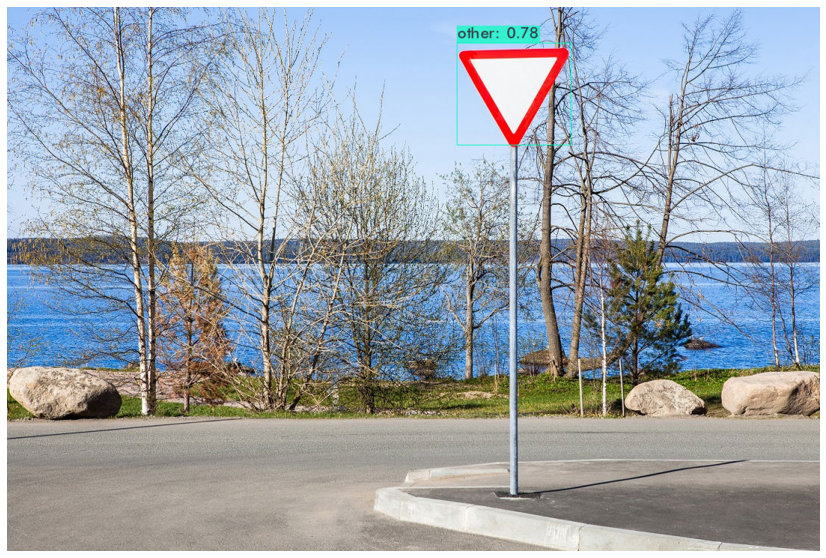

In [ ]:
# test image with last weights
!./darknet detector test data/obj_ts_data.data cfg/yolov3_ts_test.cfg /mydrive/ts_yolov3/backup/yolov3_ts_train_last.weights /mydrive/ts_test_img/traffic-sign-to-test.jpg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
# LOCAL MACHINE DOWNLOAD
# if you get an error first run then run it again and it should work
download('predictions.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Test video with last weights

In [ ]:
# !cp /mydrive/ts_test_img/traffic-sign-to-test.mp4 ./data

In [ ]:
!cp /content/vid_4_2.mp4 /content/darknet/data

In [ ]:
!ls /content/

darknet  gdrive  mAP.csv  obj_ts.zip  sample_data  vid_4_2.mp4


In [ ]:
! ./darknet detector demo data/obj_ts_data.data cfg/yolov3_ts_test.cfg /mydrive/ts_yolov3/backup/yolov3_ts_train_best.weights data/vid_4_2.mp4 -out_filename result.avi -dont_show

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer

## mean average precision graph

   Iterations       mAP  Average IOU  ...  danger AP  mandatory AP  other AP
0           0  0.000000       0.0000  ...     0.0000        0.0000    0.0000
1        1000  0.695293       0.4927  ...     0.6824        0.6953    0.6644
2        2000  0.914418       0.7102  ...     0.9202        0.8402    0.9005
3        3000  0.914256       0.7656  ...     0.9159        0.8595    0.8874
4        4000  0.910937       0.7774  ...     0.8933        0.8725    0.8995
5        5000  0.928145       0.7687  ...     0.9152        0.8782    0.9213
6        5500  0.932453       0.7920  ...     0.9154        0.8814    0.9352
7        6000  0.920611       0.7768  ...     0.9211        0.8789    0.9013
8        7000  0.933929       0.8300  ...     0.9459        0.8857    0.9063
9        8000  0.934647       0.8181  ...     0.9467        0.8857    0.9077

[10 rows x 9 columns]


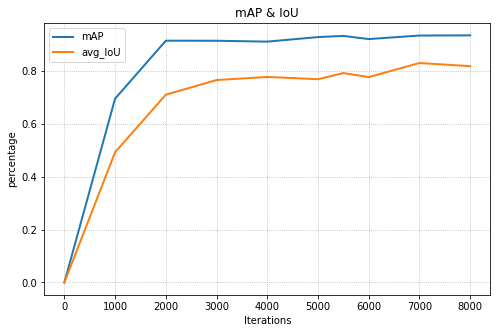

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/mAP.csv', sep=';')
print(df)
iteration = df['Iterations']
mAP = df['mAP']
IoU = df['Average IOU']

fig = plt.figure()
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.plot(iteration, mAP, linewidth=2)
plt.plot(iteration, IoU, linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('percentage')
plt.title('mAP & IoU')
plt.legend(['mAP', 'avg_IoU'])
plt.grid(linestyle=':')
plt.show()

fig.savefig('/content/MAP_IoU.svg')


   Iterations       mAP  Average IOU  ...  danger AP  mandatory AP  other AP
0           0  0.000000       0.0000  ...     0.0000        0.0000    0.0000
1        1000  0.695293       0.4927  ...     0.6824        0.6953    0.6644
2        2000  0.914418       0.7102  ...     0.9202        0.8402    0.9005
3        3000  0.914256       0.7656  ...     0.9159        0.8595    0.8874
4        4000  0.910937       0.7774  ...     0.8933        0.8725    0.8995
5        5000  0.928145       0.7687  ...     0.9152        0.8782    0.9213
6        5500  0.932453       0.7920  ...     0.9154        0.8814    0.9352
7        6000  0.920611       0.7768  ...     0.9211        0.8789    0.9013
8        7000  0.933929       0.8300  ...     0.9459        0.8857    0.9063
9        8000  0.934647       0.8181  ...     0.9467        0.8857    0.9077

[10 rows x 9 columns]


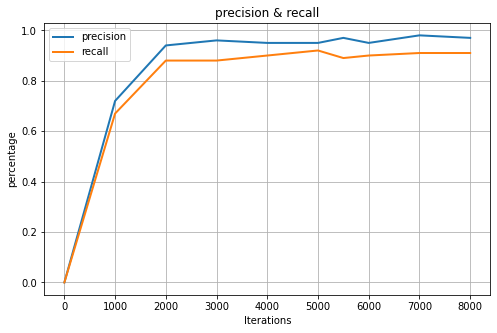

In [ ]:
# precision and recall
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/mAP.csv', sep=';')
print(df)
iteration = df['Iterations']
precision = df['precision']
recall = df['recall']

fig = plt.figure()
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.plot(iteration, precision, linewidth=2)
plt.plot(iteration, recall, linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('percentage')
plt.title('precision & recall')
plt.legend(['precision', 'recall'])
plt.grid()
plt.show()

fig.savefig('/content/preciosion_recall.svg')
